In [46]:
#MNist DATA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train[9]
#C 60 000

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

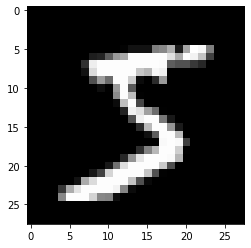

In [47]:
for i in range(1):
    fig = plt.figure
    plt.imshow(X_train[i], cmap='gray') 
    plt.show()

In [48]:
X_train2, X_test2 = X_train.reshape(60000,-1), X_test.reshape(10000,-1)
X_test2.shape, X_train2.shape
Y_train2 = Y_train.reshape(60000,1)

In [49]:
# TRAIN TEST SPLIT! 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train2, Y_train2, test_size=0.16, random_state=42)
X_train.shape, X_val.shape

((50400, 784), (9600, 784))

In [50]:
#HYPERPARAMETER TUNING

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(scaled_X_val, y_val.ravel())

y_pred = model_KNN.predict(scaled_X_val)
y_pred[:10], np.array(y_val[:10])


(array([7, 3, 8, 9, 3, 9, 7, 7, 5, 4], dtype=uint8),
 array([[7],
        [3],
        [8],
        [9],
        [3],
        [9],
        [7],
        [7],
        [5],
        [4]], dtype=uint8))

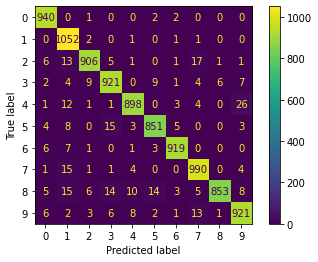

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm).plot()

[Text(0.5, 1.0, 'Elbow plot'),
 Text(0.5, 0, 'K Neighbors'),
 Text(0, 0.5, 'Error')]

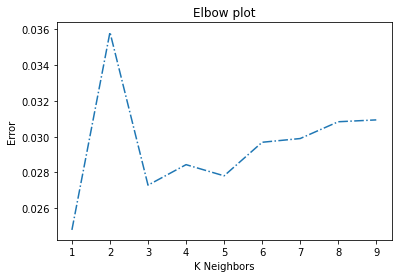

In [52]:
error_list = []
for k in range(1,10):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(scaled_X_train, y_train.ravel())
    y_pred = model_KNN.predict(scaled_X_val)
    error = 1 - accuracy_score(y_pred, y_val)
    error_list.append(error)

fig,ax = plt.figure(), plt.axes()
ax.plot(range(1,10), error_list, "-.")
ax.set(title ="Elbow plot", xlabel = "K Neighbors", ylabel = "Error")


In [53]:
Y_train.shape

(60000,)

In [54]:
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train2)
scaled_X_test = scaler.transform(X_test2)

model_KNN = KNeighborsClassifier(n_neighbors=1)
model_KNN.fit(scaled_X_train, Y_train2.ravel())

y_pred = model_KNN.predict(scaled_X_train)
y_pred[:10], np.array(Y_train2[:10])

(array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8),
 array([[5],
        [0],
        [4],
        [1],
        [9],
        [2],
        [1],
        [3],
        [1],
        [4]], dtype=uint8))

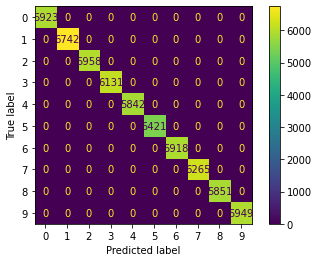

In [55]:


cm = confusion_matrix(Y_train2, y_pred)
ConfusionMatrixDisplay(cm).plot()